In [1]:
#pip install scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Train test split tool
from sklearn.model_selection import train_test_split
# Estimator, model, classifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data = pd.read_csv('./5015/penguins_size.csv')

In [4]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [7]:
df = data.dropna()
df#Cool rename 

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [8]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [10]:
df.columns = ['species', 'island', 'bill_length', 'bill_depth',
       'flipper_length', 'body_mass_g', 'sex']
df

,species,island,bill_length,bill_depth,flipper_length,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [16]:

df["species"].value_counts(normalize = True)

species
Adelie       0.437126
Gentoo       0.359281
Chinstrap    0.203593
Name: proportion, dtype: float64

C:\Users\jbram\miniconda3\envs\python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jbram\miniconda3\envs\python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\jbram\miniconda3\envs\python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\jbram\miniconda3\envs\python310\lib\site-packages\s

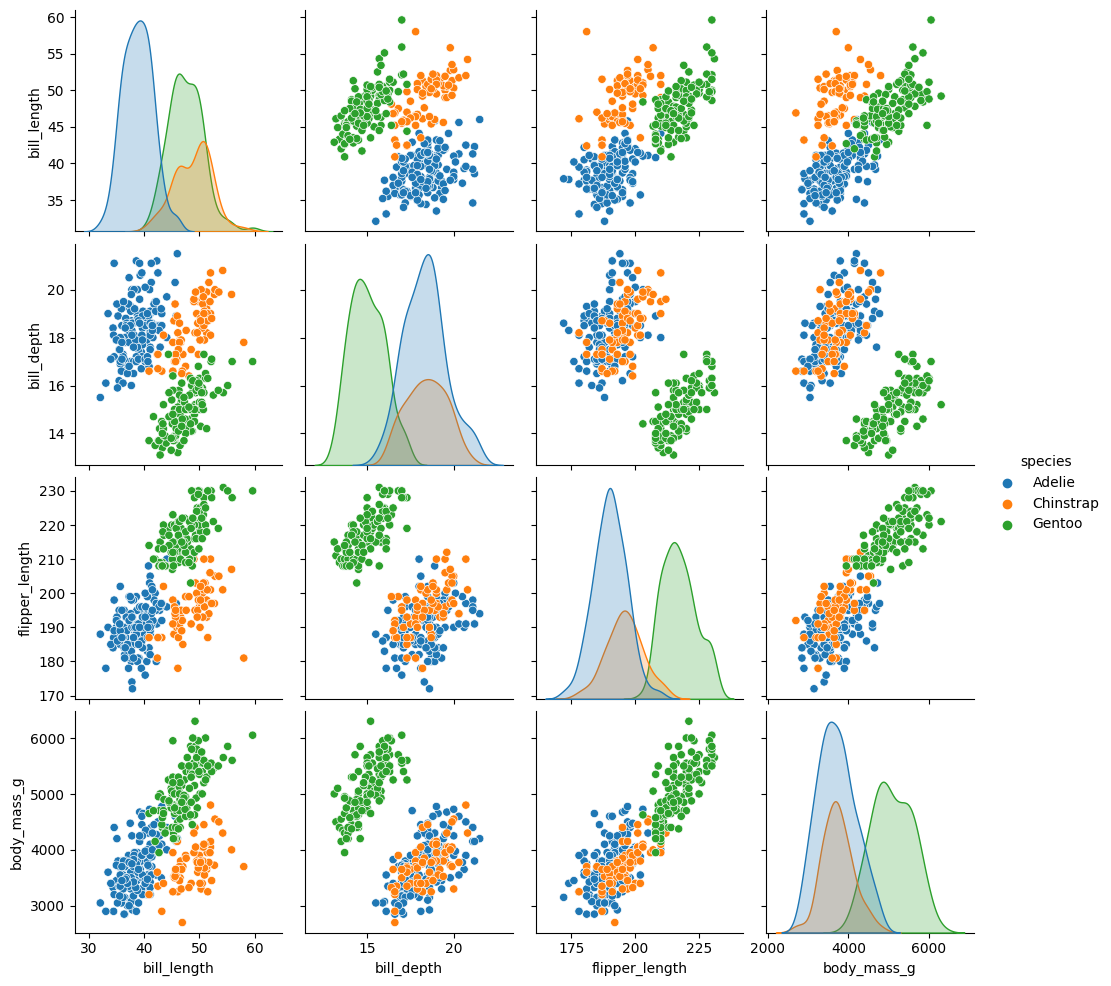

In [24]:

sns.pairplot(df, hue = 'species')

In [26]:
y = df['species']
y.info
# Target tryingt o predict!!

<bound method Series.info of 0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 334, dtype: object>

In [44]:
X = df.drop(columns=['species','island','sex'])
X.head()
X.info()
# Data passing in to predict Y

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bill_length     334 non-null    float64
 1   bill_depth      334 non-null    float64
 2   flipper_length  334 non-null    float64
 3   body_mass_g     334 non-null    float64
dtypes: float64(4)
memory usage: 13.0 KB


In [45]:
X.shape

(334, 4)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((250, 4), (84, 4), (250,), (84,))

In [48]:
knn = KNeighborsClassifier(n_neighbors=3)

In [49]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
preds_train = knn.predict(X_train)

In [55]:
knn.score(X_train, y_train)

0.884

In [56]:
preds_test = knn.predict(X_test)

In [57]:
preds_test

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie'], dtype=object)

In [58]:
np.array(y_test)

array(['Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie'], dtype=obj

In [59]:
knn.score(X_test, y_test)

0.7857142857142857

In [15]:
data["Class"].value_counts()
# normalize = True does the percentages automatically, within value_counts()

Class
0    115
1     43
Name: count, dtype: int64

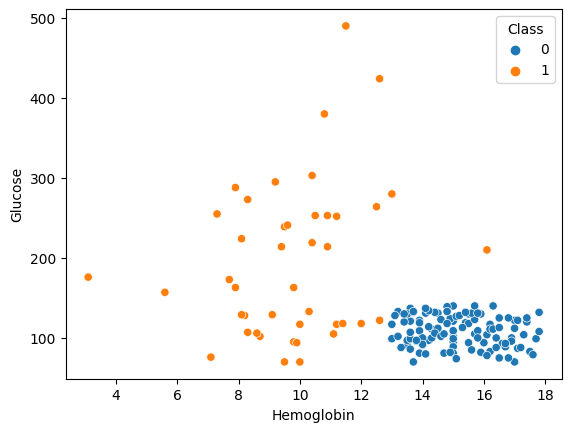

In [16]:
sns.scatterplot(x="Hemoglobin", y="Glucose", data=data, hue="Class")
plt.show()

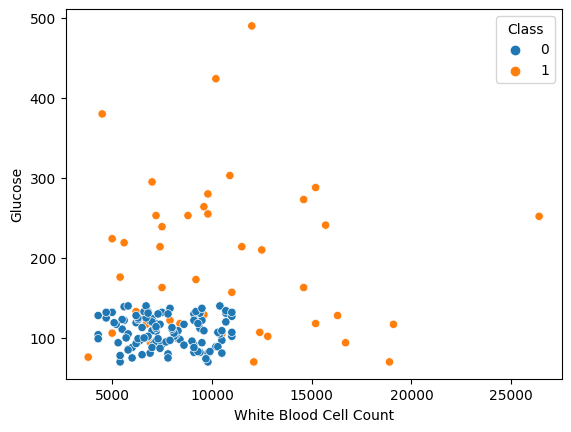

In [17]:
sns.scatterplot(x="White Blood Cell Count", y="Glucose", data=data, hue="Class")
plt.show()

In [19]:
# isolating y variable (what is predicted - dependant variable)
y = data["Class"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [20]:
# Isolated X variable, what is used to predict y
# Captial X mean matrices
X = data.drop(columns="Class")
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      158 non-null    int64  
 1   Blood Pressure           158 non-null    int64  
 2   Specific Gravity         158 non-null    float64
 3   Albumin                  158 non-null    int64  
 4   Sugar                    158 non-null    int64  
 5   Red Blood Cells          158 non-null    object 
 6   Pus Cell                 158 non-null    object 
 7   Pus Cell clumps          158 non-null    object 
 8   Bacteria                 158 non-null    object 
 9   Glucose                  158 non-null    int64  
 10  Blood Urea               158 non-null    int64  
 11  Serum Creatinine         158 non-null    float64
 12  Sodium                   158 non-null    int64  
 13  Potassium                158 non-null    float64
 14  Hemoglobin               1

In [21]:
X = X[["Age", "Blood Pressure", "Specific Gravity", "Albumin", "Sugar", "Glucose", "Blood Urea", "Serum Creatinine", "Sodium", "Potassium", "Hemoglobin",
      "Packed Cell Volume", "White Blood Cell Count", "Red Blood Cell Count"]]
# Returns as a DataFrame with [[]] above.
X.head()


,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count
0,48,70,1.005,4,0,117,56,3.8,111,2.5,11.2,32,6700,3.9
1,53,90,1.020,2,0,70,107,7.2,114,3.7,9.5,29,12100,3.7
2,63,70,1.010,3,0,380,60,2.7,131,4.2,10.8,32,4500,3.8
3,68,80,1.010,3,2,157,90,4.1,130,6.4,5.6,16,11000,2.6
4,61,80,1.015,2,0,173,148,3.9,135,5.2,7.7,24,9200,3.2


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [23]:
X_train.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count
26,83,70,1.020,3,0,102,60,2.6,115,5.7,8.7,26,12800,3.1
136,58,70,1.025,0,0,88,16,1.1,147,3.5,16.4,53,9100,5.2
78,34,60,1.020,0,0,91,49,1.2,135,4.5,13.5,48,8600,4.9
149,36,80,1.025,0,0,85,16,1.1,142,4.1,15.6,44,5800,6.3
36,60,90,1.010,3,5,490,95,2.7,131,3.8,11.5,35,12000,4.5


In [24]:
X_test.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count
128,30,80,1.025,0,0,82,42,0.7,146,5.0,14.9,45,9400,5.9
45,45,80,1.025,0,0,82,49,0.6,147,4.4,15.9,46,9100,4.7
134,79,80,1.025,0,0,111,44,1.2,146,3.6,16.3,40,8000,6.4
156,17,60,1.025,0,0,114,50,1.0,135,4.9,14.2,51,7200,5.9
90,58,70,1.020,0,0,102,48,1.2,139,4.3,15.0,40,8100,4.9


In [25]:
y_train.head()

26     1
136    0
78     0
149    0
36     1
Name: Class, dtype: int64

In [26]:
y_test.head()

128    0
45     0
134    0
156    0
90     0
Name: Class, dtype: int64

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# another check

((118, 14), (40, 14), (118,), (40,))

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)

In [30]:
knn.fit(X_train, y_train)
# Fit or assign knn to the training data 

KNeighborsClassifier(n_neighbors=3)

In [31]:
preds_train = knn.predict(X_train)

In [33]:
knn.score(X_train, y_train)
#Result is the Percentage the predictions were correct.. in this example 85.59% correct

0.8559322033898306

In [34]:
preds_test = knn.predict(X_test)

In [35]:
preds_test

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [39]:
y_test

7      1
44     0
113    0
120    0
63     0
122    0
121    0
139    0
109    0
92     0
24     1
141    0
26     1
60     0
80     0
97     0
129    0
98     0
142    0
56     0
45     0
33     1
59     0
8      1
40     1
37     1
101    0
19     1
144    0
108    0
51     0
54     0
16     1
130    0
134    0
22     1
93     0
66     0
112    0
94     0
Name: Class, dtype: int64

In [37]:
knn.score(X_test, y_test)


0.825